** **

In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!wget https://raw.githubusercontent.com/classarnaldojr/23-4si-cp1-enzomanzo/main/circulo.PNG?token=GHSAT0AAAAAAB6XKWZNOWSDTTI2GPUERRL4ZAKNZIQ /content

--2023-03-09 23:39:48--  https://raw.githubusercontent.com/classarnaldojr/23-4si-cp1-enzomanzo/main/circulo.PNG?token=GHSAT0AAAAAAB6XKWZNOWSDTTI2GPUERRL4ZAKNZIQ
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18594 (18K) [image/png]
Saving to: ‘circulo.PNG?token=GHSAT0AAAAAAB6XKWZNOWSDTTI2GPUERRL4ZAKNZIQ’

circulo.PNG?token=G 100%[===================>]  18.16K  --.-KB/s    in 0s      

2023-03-09 23:39:48 (101 MB/s) - ‘circulo.PNG?token=GHSAT0AAAAAAB6XKWZNOWSDTTI2GPUERRL4ZAKNZIQ’ saved [18594/18594]

/content: Scheme missing.
FINISHED --2023-03-09 23:39:48--
Total wall clock time: 0.1s
Downloaded: 1 files, 18K in 0s (101 MB/s)


In [55]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

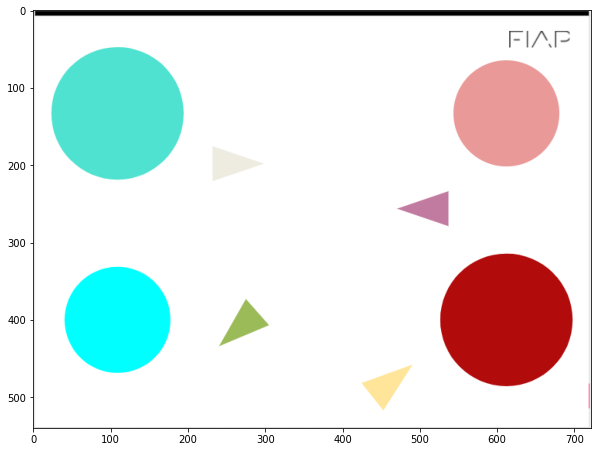

In [79]:
circulo = cv2.imread('/content/drive/MyDrive/circulo.png')
circulo = cv2.cvtColor(circulo, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(circulo); plt.show()

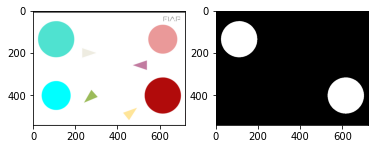

In [85]:
circulo_hsv = cv2.cvtColor(circulo, cv2.COLOR_BGR2HSV)


image_lower_hsv = np.array([31, 130, 140])  
image_upper_hsv = np.array([50, 255, 255])

image_lower_hsv2 = np.array([90, 170, 140])  
image_upper_hsv2 = np.array([180, 255, 255])


mask_hsv = cv2.inRange(circulo_hsv, image_lower_hsv, image_upper_hsv)
mask_hsv2 = cv2.inRange(circulo_hsv, image_lower_hsv2, image_upper_hsv2)

masksoma = cv2.bitwise_or(mask_hsv, mask_hsv2)


plt.subplot(1, 2, 1)
plt.imshow(circulo)
plt.subplot(1, 2, 2)
plt.imshow(masksoma, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

In [58]:
contornos, _ = cv2.findContours(masksoma, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

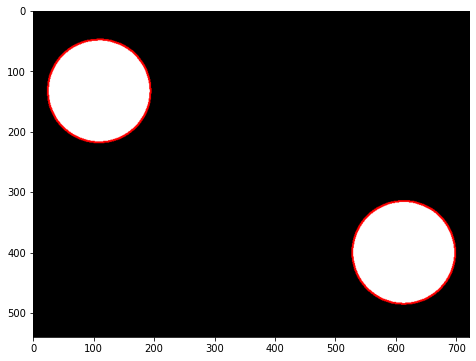

In [108]:
circulo = cv2.cvtColor(masksoma, cv2.COLOR_GRAY2RGB) 
contornos_img = circulo.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 2);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img);

In [70]:
cnt = contornos[0]

M = cv2.moments(cnt)
print( M )

{'m00': 22601.0, 'm10': 13832452.5, 'm01': 9036291.0, 'm20': 8506543333.0, 'm11': 5530466610.916666, 'm02': 3653482590.833333, 'm30': 5256053220701.25, 'm21': 3401072439550.5835, 'm12': 2236034954405.0835, 'm03': 1493200180613.5, 'mu20': 40690398.84857845, 'mu11': 435.36348247528076, 'mu02': 40609043.79200745, 'mu30': 275633.6767578125, 'mu21': 1115034.531030655, 'mu12': -277019.24506378174, 'mu03': -1099333.2534179688, 'nu20': 0.0796593276045724, 'nu11': 8.523082412296752e-07, 'nu02': 0.0795000593425975, 'nu30': 3.5893279441167303e-06, 'nu21': 1.4520085672985475e-05, 'nu12': -3.6073709463274784e-06, 'nu03': -1.4315622143142323e-05}


In [61]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

print("centro de massa na possição: ",cx, cy)

centro de massa na possição:  612 399


In [93]:
cnt = contornos[1]

M2 = cv2.moments(cnt)
print( M2 )

{'m00': 22597.0, 'm10': 2460000.0, 'm01': 3006807.5, 'm20': 308434545.8333333, 'm11': 327335870.5833333, 'm02': 440734243.0, 'm30': 42422153227.0, 'm21': 41040676921.75, 'm12': 47982204118.416664, 'm03': 69461734831.75, 'mu20': 40629084.93144369, 'mu11': 2753.355382680893, 'mu02': 40641693.45553613, 'mu30': -1357885.6566696167, 'mu21': -914978.9112863541, 'mu12': 1375008.391899109, 'mu03': 898227.384979248, 'nu20': 0.07956745548261421, 'nu11': 5.392134285301846e-06, 'nu02': 0.07959214784723721, 'nu30': -1.769034231951215e-05, 'nu21': -1.1920215871113205e-05, 'nu12': 1.7913414892794206e-05, 'nu03': 1.1701979355180171e-05}


In [94]:
cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])

print("centro de massa na possição: ",cx2, cy2)

centro de massa na possição:  108 133


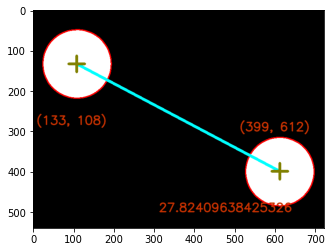

In [110]:
size = 20
color = (128,128,0)


cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

cv2.line(contornos_img,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img,(cx2,cy2 - size),(cx2, cy2 + size),color,5)


# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text1 = cy , cx
origem1 = (cx-100,cy-100)

text2 = cy2 , cx2
origem2 = (cx2-100,cy2+150)

cv2.putText(contornos_img, str(text1), origem1, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.putText(contornos_img, str(text2), origem2, font,1,(200,50,0),2,cv2.LINE_AA)



plt.imshow(contornos_img);

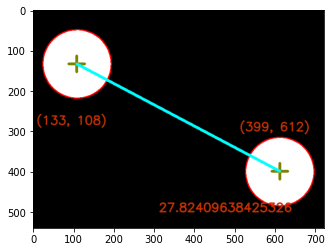

In [111]:
import math

size = 20
color = (0,255,255)

cv2.line(contornos_img,(cx,cy),(cx2,cy2),color,5)

dx = cx - cx2
dy = cy - cy2

#math.atan2 pega o angulo
angulos = math.atan2(dy,dx)

#math.degrees transforma em graus
angulo_graus = math.degrees(angulos)

#coloca na imagem o texto
font = cv2.FONT_HERSHEY_SIMPLEX
textoAngulo = angulo_graus
angulo1 = (cx-300,cy+100)

cv2.putText(contornos_img, str(textoAngulo), angulo1, font,1,(200,50,0),2,cv2.LINE_AA)

plt.imshow(contornos_img);

